In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
ratings_df = pd.read_csv('ratings.dat', sep="::", engine="python", header=None, names=["user_id", "movie_id", "rating", "timestamp"])
tags_df = pd.read_csv('tags.dat', sep="::", engine="python", header=None, names=["user_id", "movie_id", "tag", "timestamp"])
movies_df = pd.read_csv('movies.dat', sep="::", engine="python", header=None, names=["movie_id", "title", "genres"])


In [3]:
ratings_df.head(), tags_df.head(), movies_df.head()

(   user_id  movie_id  rating  timestamp
 0        1       122     5.0  838985046
 1        1       185     5.0  838983525
 2        1       231     5.0  838983392
 3        1       292     5.0  838983421
 4        1       316     5.0  838983392,
    user_id  movie_id              tag   timestamp
 0       15      4973       excellent!  1215184630
 1       20      1747         politics  1188263867
 2       20      1747           satire  1188263867
 3       20      2424  chick flick 212  1188263835
 4       20      2424            hanks  1188263835,
    movie_id                               title  \
 0         1                    Toy Story (1995)   
 1         2                      Jumanji (1995)   
 2         3             Grumpier Old Men (1995)   
 3         4            Waiting to Exhale (1995)   
 4         5  Father of the Bride Part II (1995)   
 
                                         genres  
 0  Adventure|Animation|Children|Comedy|Fantasy  
 1                   Adventure|C

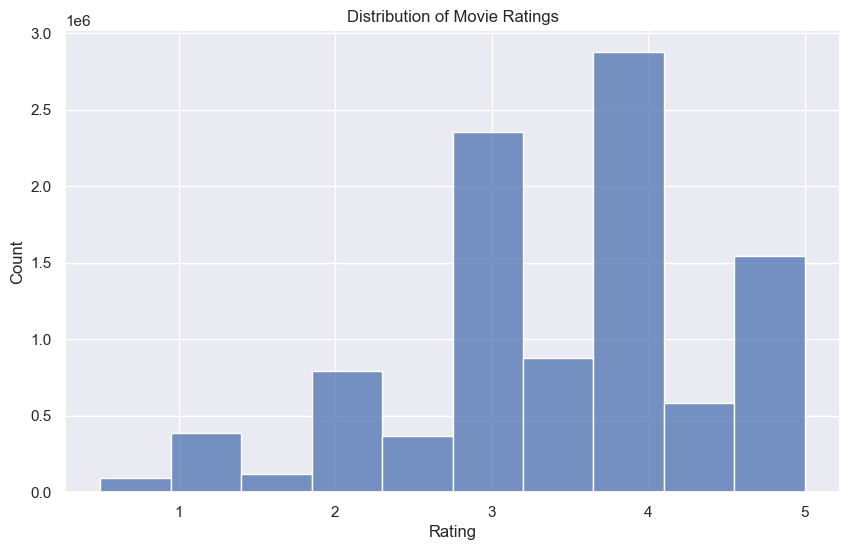

In [4]:
# Set the theme for seaborn
sns.set_theme()

# Plotting the distribution of ratings
plt.figure(figsize=(10,6))
sns.histplot(ratings_df['rating'], kde=False, bins=10)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


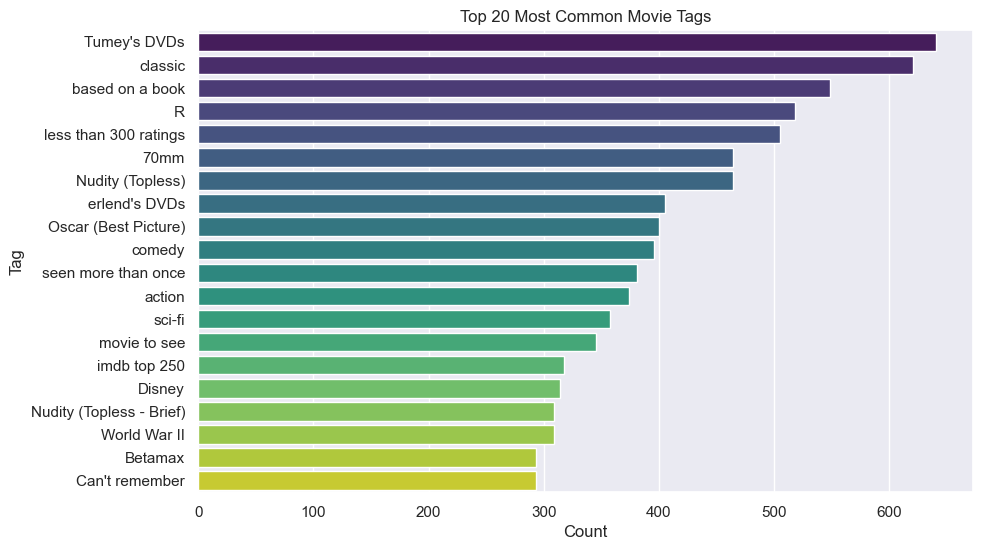

In [5]:
# Counting the frequency of each tag
tag_counts = tags_df['tag'].value_counts().head(20)

# Plotting the most common tags
plt.figure(figsize=(10,6))
sns.barplot(x=tag_counts.values, y=tag_counts.index, palette='viridis')
plt.title('Top 20 Most Common Movie Tags')
plt.xlabel('Count')
plt.ylabel('Tag')
plt.show()


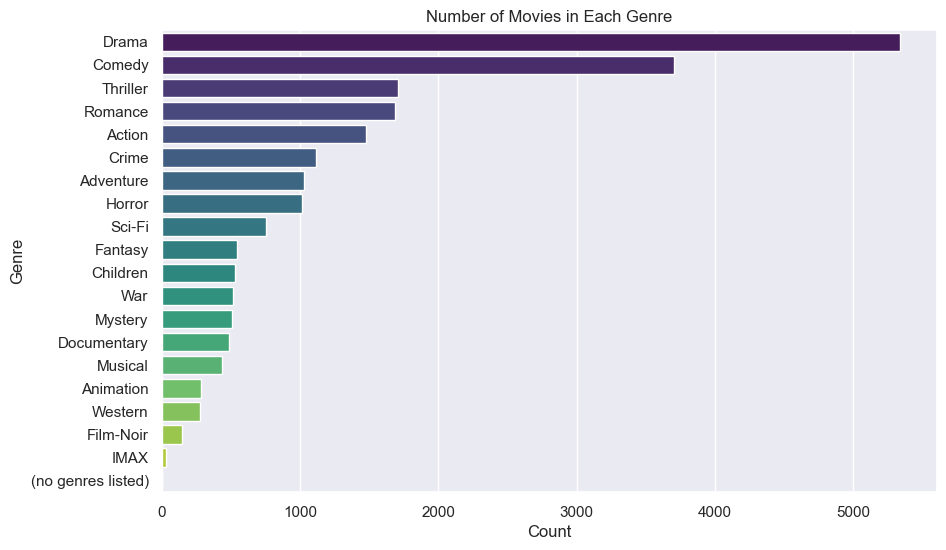

In [6]:
# Splitting the genre string into separate genres and counting the frequency of each genre
genre_counts = movies_df['genres'].str.split('|').explode().value_counts()

# Plotting the number of movies in each genre
plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Number of Movies in Each Genre')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


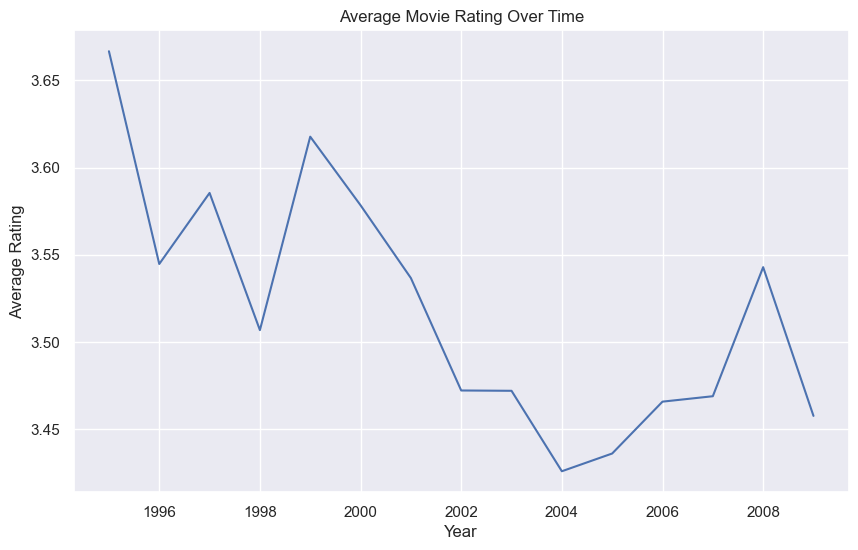

In [8]:
# Converting the timestamp into datetime format
ratings_df['datetime'] = pd.to_datetime(ratings_df['timestamp'], unit='s')

# Extracting the year from the datetime
ratings_df['year'] = ratings_df['datetime'].dt.year

# Grouping the ratings by year
yearly_average_ratings = ratings_df.groupby('year')['rating'].mean()

# Plotting the average rating for each year
plt.figure(figsize=(10,6))
sns.lineplot(x=yearly_average_ratings.index, y=yearly_average_ratings.values)
plt.title('Average Movie Rating Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()


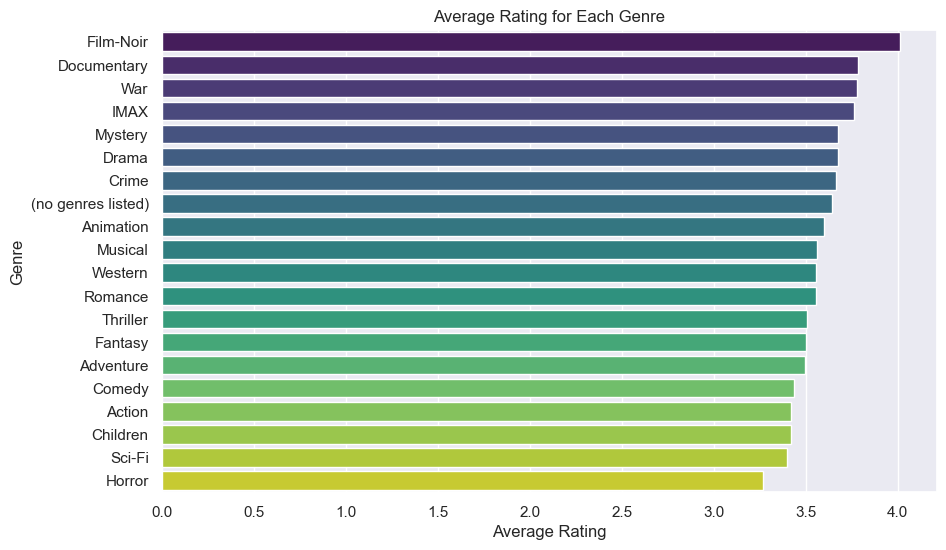

In [10]:
# Merge movies and ratings dataframes
movies_ratings_df = pd.merge(movies_df, ratings_df, on='movie_id')

# Split genres and explode so that each row contains only one genre
movies_ratings_df['genres'] = movies_ratings_df['genres'].str.split('|')
movies_ratings_df = movies_ratings_df.explode('genres')

# Calculate the average rating for each genre
average_ratings_by_genre = movies_ratings_df.groupby('genres')['rating'].mean().sort_values(ascending=False)

# Plotting the average rating for each genre
plt.figure(figsize=(10,6))
sns.barplot(x=average_ratings_by_genre.values, y=average_ratings_by_genre.index, palette='viridis')
plt.title('Average Rating for Each Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()


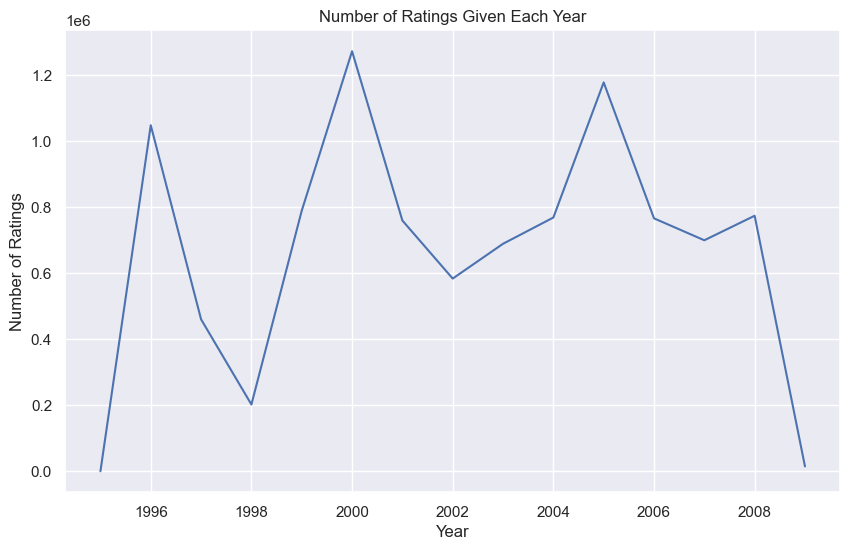

In [11]:
# Count the number of ratings for each year
num_ratings_per_year = ratings_df.groupby('year')['rating'].count()

# Plotting the number of ratings given each year
plt.figure(figsize=(10,6))
sns.lineplot(x=num_ratings_per_year.index, y=num_ratings_per_year.values)
plt.title('Number of Ratings Given Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.show()


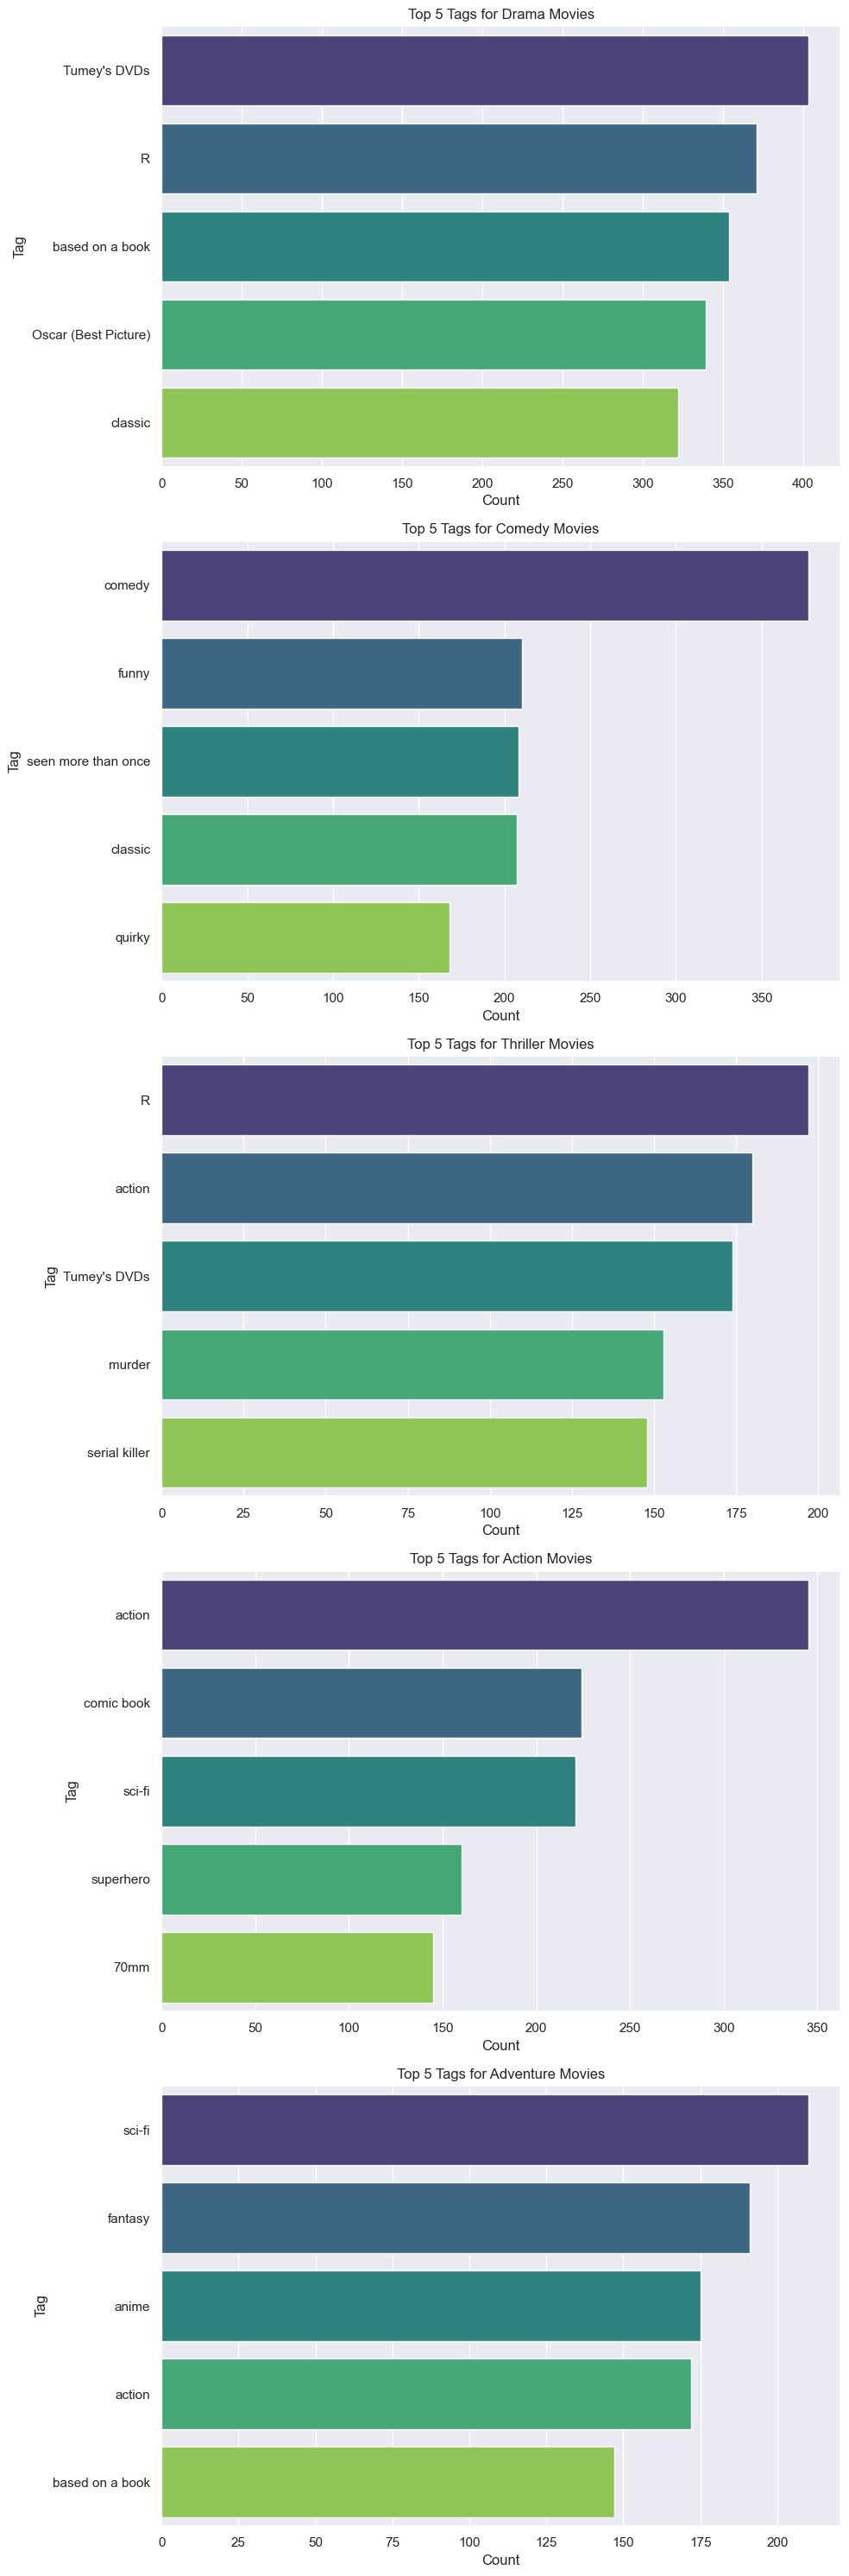

In [13]:
# Merge movies and tags dataframes
movies_tags_df = pd.merge(movies_df, tags_df, on='movie_id')

# Split genres and explode so that each row contains only one genre
movies_tags_df['genres'] = movies_tags_df['genres'].str.split('|')
movies_tags_df = movies_tags_df.explode('genres')

# Selecting the top 5 genres
top_genres = movies_tags_df['genres'].value_counts().index[:5]

# Creating a figure and axes for subplots
fig, axes = plt.subplots(5, 1, figsize=(10, 30))

# For each genre, plot the top 5 tags
for i, genre in enumerate(top_genres):
    genre_tags = movies_tags_df[movies_tags_df['genres'] == genre]['tag']
    top_genre_tags = genre_tags.value_counts().head(5)
    
    sns.barplot(ax=axes[i], x=top_genre_tags.values, y=top_genre_tags.index, palette='viridis')
    axes[i].set_title(f'Top 5 Tags for {genre} Movies')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel('Tag')

plt.tight_layout()
plt.show()


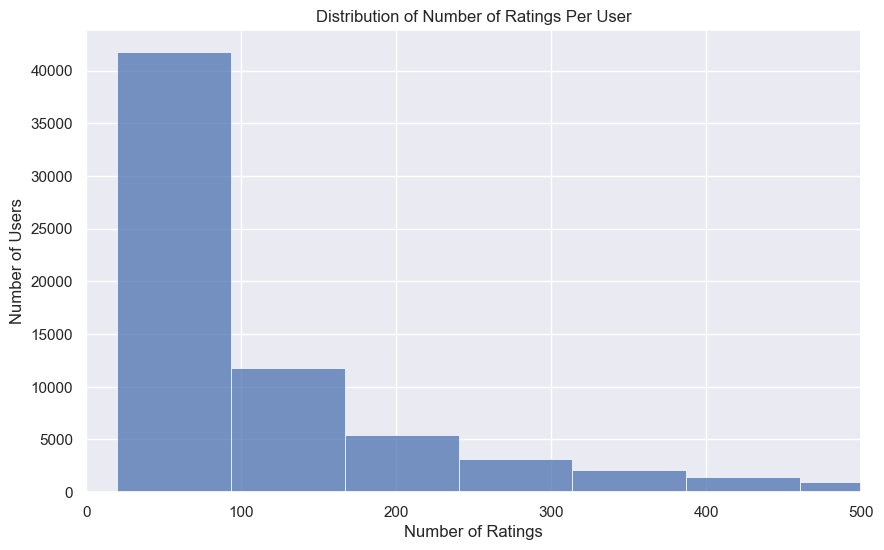

In [14]:
# Count the number of ratings given by each user
num_ratings_per_user = ratings_df['user_id'].value_counts()

# Plotting the distribution of the number of ratings per user
plt.figure(figsize=(10,6))
sns.histplot(num_ratings_per_user, kde=False, bins=100)
plt.title('Distribution of Number of Ratings Per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.xlim(0, 500)  # Limit x-axis for better visibility
plt.show()


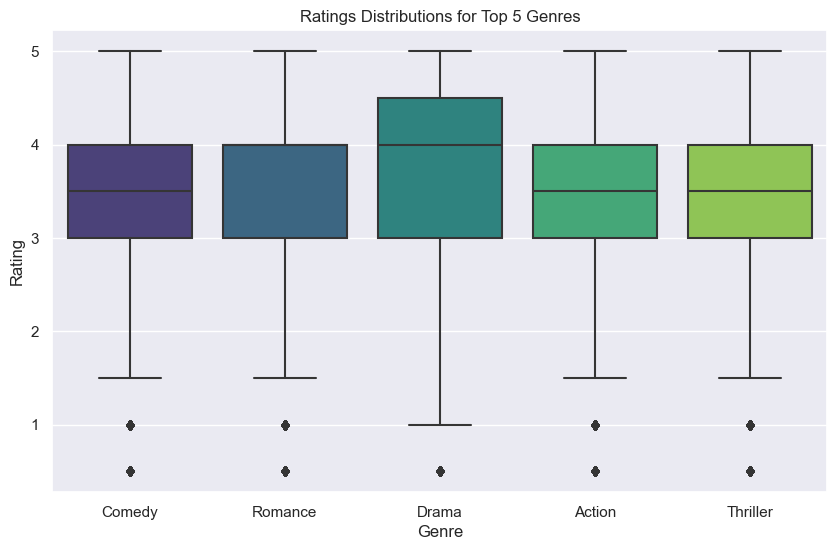

In [15]:
# Selecting the top 5 genres
top_genres = ['Drama', 'Comedy', 'Thriller', 'Action', 'Romance']

# Filtering the dataframe to include only the top 5 genres
top_genres_df = movies_ratings_df[movies_ratings_df['genres'].isin(top_genres)]

# Plotting the ratings distributions for the top 5 genres
plt.figure(figsize=(10,6))
sns.boxplot(x='genres', y='rating', data=top_genres_df, palette='viridis')
plt.title('Ratings Distributions for Top 5 Genres')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.show()


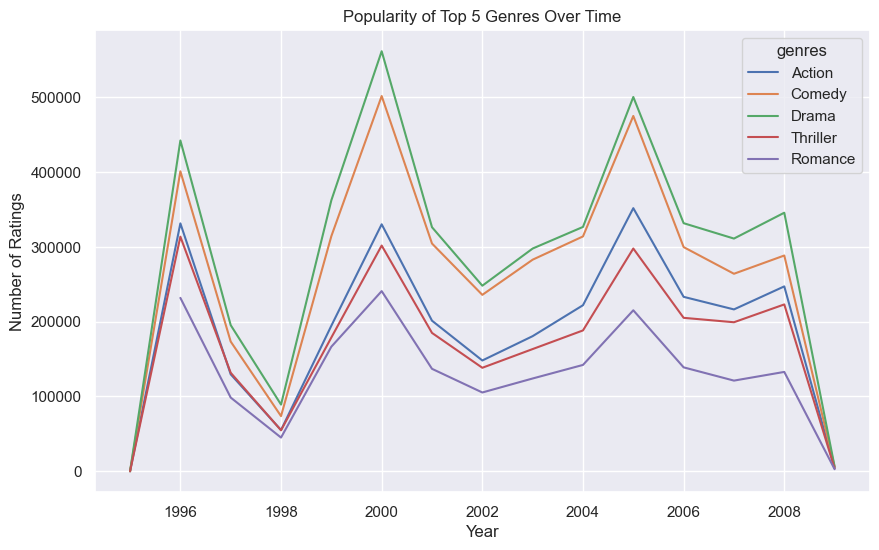

In [16]:
# Grouping by year and genre and counting the number of ratings for each
genre_popularity = movies_ratings_df.groupby(['year', 'genres'])['rating'].count().reset_index()

# Filtering to include only the top 5 genres
genre_popularity = genre_popularity[genre_popularity['genres'].isin(top_genres)]

# Plotting the number of ratings for the top 5 genres over time
plt.figure(figsize=(10,6))
sns.lineplot(x='year', y='rating', hue='genres', data=genre_popularity)
plt.title('Popularity of Top 5 Genres Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.show()


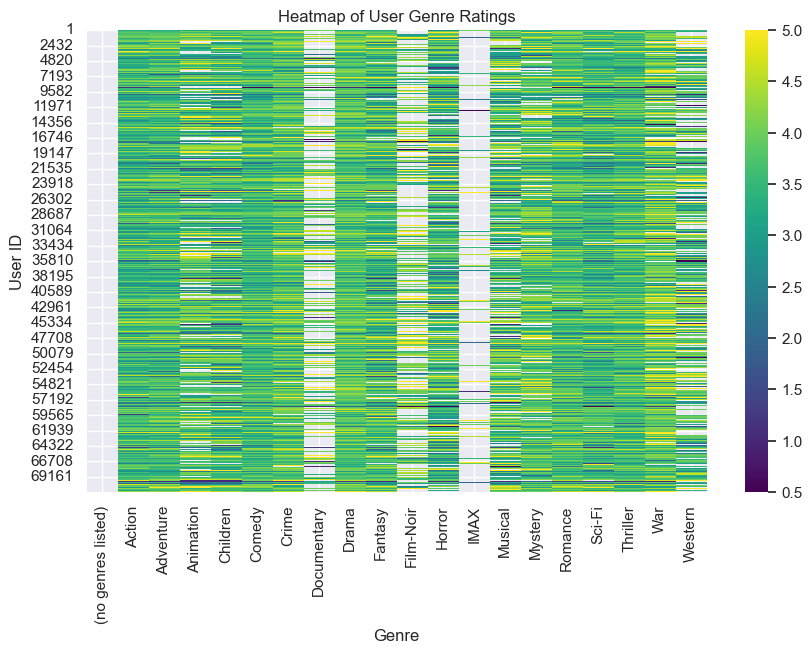

In [18]:
# Grouping by user and genre and calculating the average rating for each
user_genre_ratings = movies_ratings_df.groupby(['user_id', 'genres'])['rating'].mean().reset_index()

# Pivoting the data to create a matrix of users and genres
user_genre_ratings_pivot = user_genre_ratings.pivot(index='user_id', columns='genres', values='rating')

# Plotting a heatmap of user genre ratings
plt.figure(figsize=(10,6))
sns.heatmap(user_genre_ratings_pivot, cmap='viridis')
plt.title('Heatmap of User Genre Ratings')
plt.xlabel('Genre')
plt.ylabel('User ID')
plt.show()


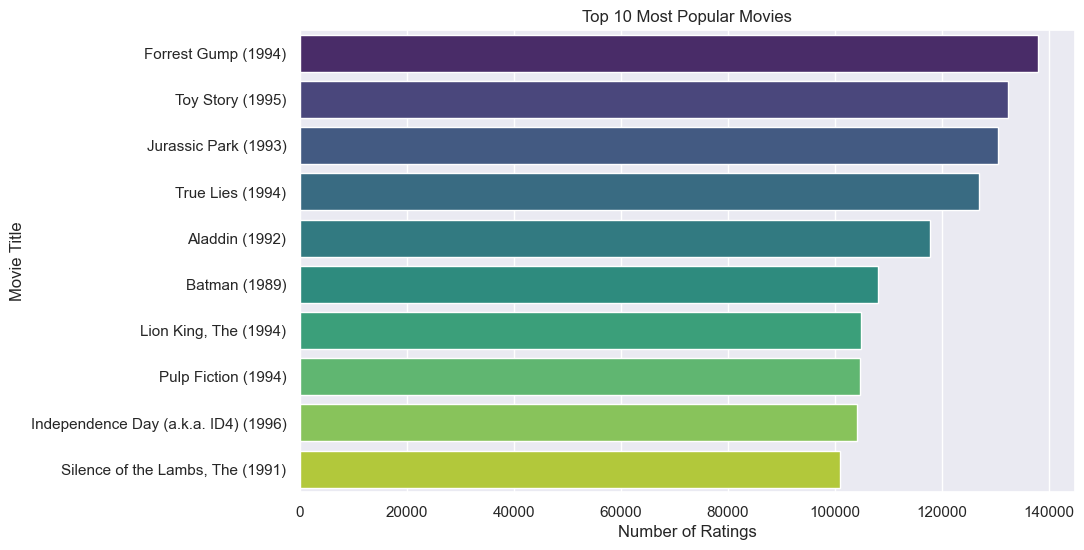

In [19]:
# Counting the number of ratings for each movie
movie_popularity = movies_ratings_df['title'].value_counts().head(10)

# Plotting the top 10 most popular movies
plt.figure(figsize=(10,6))
sns.barplot(x=movie_popularity.values, y=movie_popularity.index, palette='viridis')
plt.title('Top 10 Most Popular Movies')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.show()


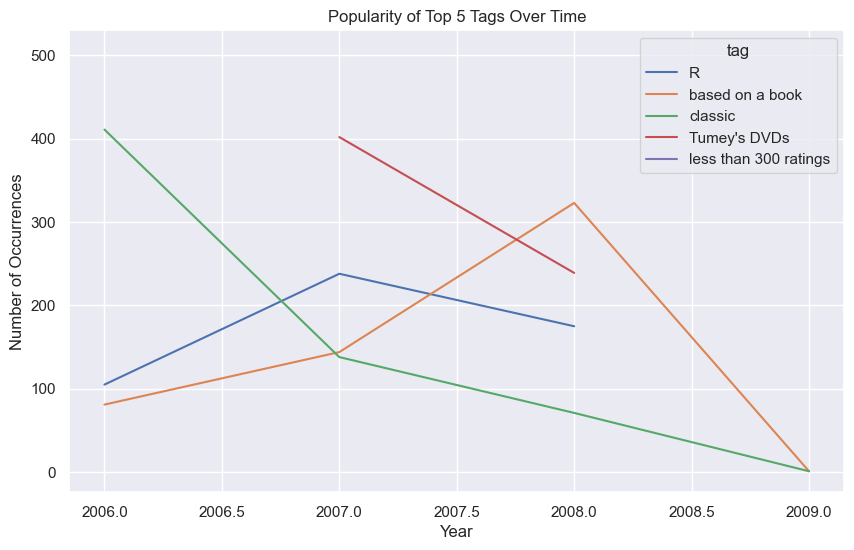

In [20]:
# Converting the timestamp into datetime format
tags_df['datetime'] = pd.to_datetime(tags_df['timestamp'], unit='s')

# Extracting the year from the datetime
tags_df['year'] = tags_df['datetime'].dt.year

# Selecting the top 5 tags
top_tags = tags_df['tag'].value_counts().index[:5]

# Grouping by year and tag and counting the number of occurrences for each
tag_popularity = tags_df.groupby(['year', 'tag'])['tag'].count().reset_index(name='count')

# Renaming the columns for clarity
tag_popularity.columns = ['year', 'tag', 'count']

# Filtering to include only the top 5 tags
tag_popularity = tag_popularity[tag_popularity['tag'].isin(top_tags)]

# Plotting the popularity of the top 5 tags over time
plt.figure(figsize=(10,6))
sns.lineplot(x='year', y='count', hue='tag', data=tag_popularity)
plt.title('Popularity of Top 5 Tags Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
plt.show()


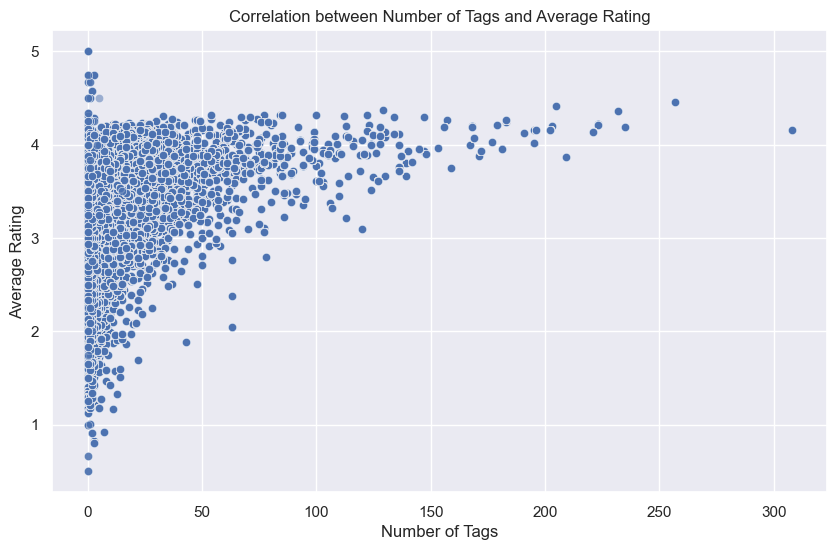

In [22]:
# Counting the number of tags for each movie
num_tags = tags_df['movie_id'].value_counts()

# Creating a dataframe from the series
num_tags_df = num_tags.reset_index()
num_tags_df.columns = ['movie_id', 'num_tags']

# Merging the num_tags dataframe with the movies_ratings dataframe
movies_ratings_tags_df = pd.merge(movies_ratings_df, num_tags_df, on='movie_id', how='left')

# Filling NA values with 0 (for movies with no tags)
movies_ratings_tags_df['num_tags'] = movies_ratings_tags_df['num_tags'].fillna(0)

# Calculating the average rating for each movie
average_ratings = movies_ratings_tags_df.groupby('movie_id')['rating'].mean()

# Merging the average_ratings series with the movies_ratings_tags dataframe
movies_ratings_tags_df = pd.merge(movies_ratings_tags_df, average_ratings, on='movie_id', how='left')

# Renaming the columns for clarity
movies_ratings_tags_df.columns = ['movie_id', 'title', 'genres', 'user_id', 'rating_x', 'timestamp', 'datetime', 'year', 'num_tags', 'average_rating']

# Calculating the correlation between the number of tags and the average rating
correlation = movies_ratings_tags_df[['num_tags', 'average_rating']].corr()

# Scatter plot of the number of tags and the average rating
plt.figure(figsize=(10,6))
sns.scatterplot(x='num_tags', y='average_rating', data=movies_ratings_tags_df, alpha=0.5)
plt.title('Correlation between Number of Tags and Average Rating')
plt.xlabel('Number of Tags')
plt.ylabel('Average Rating')
plt.show()



In [32]:
# Calculate the average rating and number of ratings for each movie
movies_clustering_df = movies_ratings_df.groupby('title').agg({'rating': ['mean', 'count']}).reset_index()

# Flatten the multi-level index
movies_clustering_df.columns = ['title', 'average_rating', 'num_ratings']

# Standardize the features
scaler = StandardScaler()
movies_clustering_df[['average_rating', 'num_ratings']] = scaler.fit_transform(movies_clustering_df[['average_rating', 'num_ratings']])

# Run the K-Means algorithm
kmeans = KMeans(n_clusters=5, random_state=0).fit(movies_clustering_df[['average_rating', 'num_ratings']])

# Add the cluster labels to the dataframe
movies_clustering_df['cluster'] = kmeans.labels_


C:\Users\lutad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,title,average_rating,num_ratings,cluster
0,"""Great Performances"" Cats (1998)",0.690256,-0.309193,0
1,'Round Midnight (1986),0.931304,-0.297214,0
2,'Til There Was You (1997),-0.624780,-0.232988,4
3,"'burbs, The (1989)",-0.392551,-0.118297,4
4,'night Mother (1986),0.455505,-0.283069,0


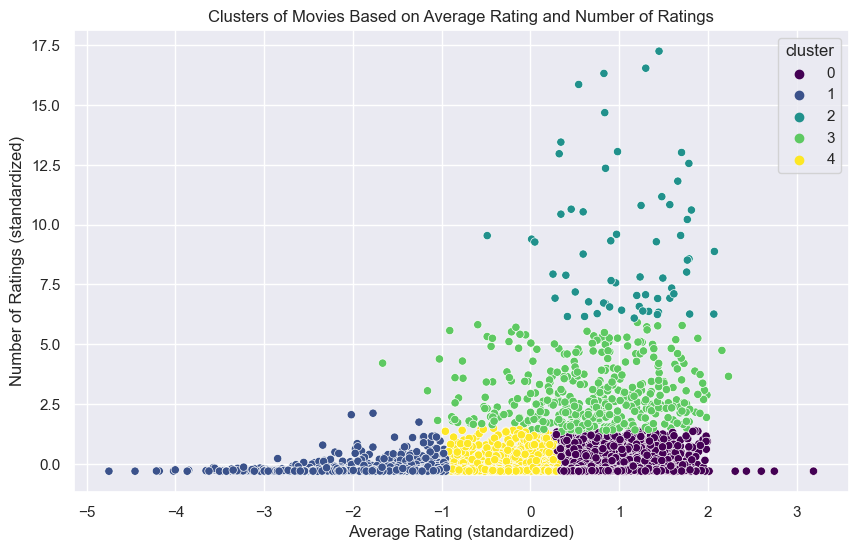

In [33]:
# Scatter plot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='average_rating', y='num_ratings', hue='cluster', palette='viridis', data=movies_clustering_df)
plt.title('Clusters of Movies Based on Average Rating and Number of Ratings')
plt.xlabel('Average Rating (standardized)')
plt.ylabel('Number of Ratings (standardized)')
plt.show()
